# Pytorch Computer Vision

* See reference notebook for more details - https://github.com/aungsannphyo/PyTorch-for-Deep-Learning-Machine-Learning/blob/main/03_pytorch_computer_vision.ipynb

* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## Computer vision library in pytorch

* `torchvision` - base domain library for computer vision in pytorch - https://docs.pytorch.org/vision/stable/index.html
* `torchvision.datasets` - provides popular datasets for computer vision such as ImageNet, CIFAR-10, MNIST, etc.
* `torchvision.models` - provides popular models for computer vision such as ResNet, VGG, Inception, etc.
* `torchvision.transforms` - provides popular transformations for computer vision such as resizing, cropping, flipping, etc.
* `torchvision.utils` - provides popular utilities for computer vision such as image visualization, etc.
* `torchvision.io` - provides popular utilities for computer vision such as image visualization, etc.
* `torchvision.data.Dataset` - Base Dataset class for pytorch
* `torchvision.data.DataLoader` - Base DataLoader class for pytorch

In [3]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import v2

# ToTensor is deprecated so use ToImage and ToDtype for modern torchvision 
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

# import matplotlib
import matplotlib.pyplot as plt


# check torch version
print(torch.__version__)
print(torchvision.__version__)

2.7.1
0.22.1


## 1. Getting a dataset

That data set will be using FashionMNIST - https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [4]:

# Setup Training Data
train_data = datasets.FashionMNIST(
    root="data",  # where to download data to
    train=True, # do we want the trainning dataset?
    download=True, # do we want to download?
    transform=transform,  # how do we want to transform the data?
        target_transform=None # how do we want to transform the labels/targets ?
    )

test_data = datasets.FashionMNIST(
    root="data", 
    train=False,
    download=True,
    transform=transform,
    target_transform=None
)

    

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# See the first training example
image, label = train_data[0]
image, label

(Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
          0.0000, 0.0039, 0.0157, 0.0000,

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input out shape of our data

In [10]:
# Check the shape of our image 
print(f"Image Shape : {image.shape} -> [color_channels, height, width]")

# Check the image label
print(f"Image Label : {class_names[label]}, {label}")


Image Shape : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label : Ankle boot, 9


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

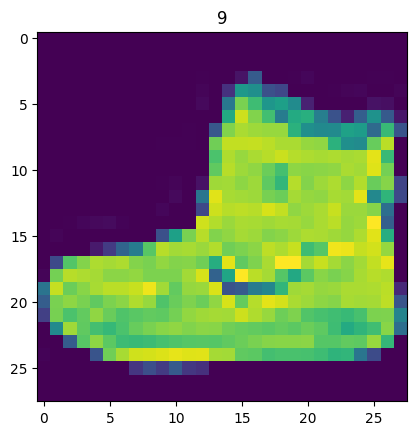

In [11]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

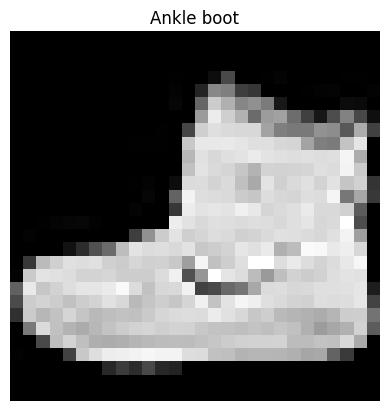

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

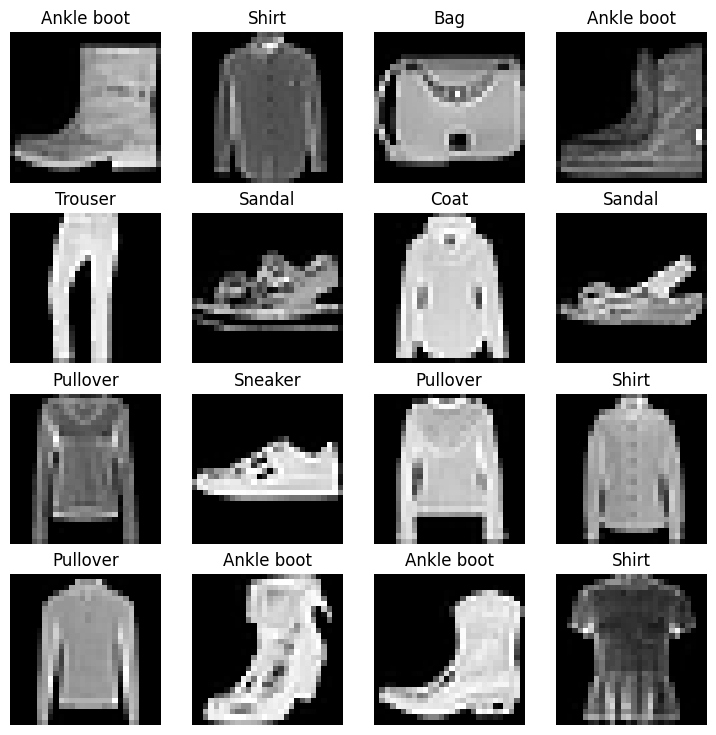

In [13]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
row, col = 4, 4
for i in range (1, row * col + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")
plt.show()


In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
            ),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
            ))

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch datasets.
DataLoader turns our data into python iterable.
More specifically, we want to turn our data into batches(mini-batches).
Why would we do this?
1. It is more computationally efficient, as in your computing hardware is better at processing. right now our data have 60,000 images,that is quite small data set in real world this will be million or billion images.
2. It gives our neural network more opportunities to update its gradients per epoch, as in it can see more data.

For more mini-batches, see here - https://www.youtube.com/watch?v=4qJaSmvhxi8&t=12s

In [15]:
from torch.utils.data import DataLoader

# Setup for batchs size of hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterable
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True, # shuffle the data?
    num_workers=4, # parallel workers for faster loading
    pin_memory=False, # pin memory for faster data loading
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    pin_memory=False,
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x114abd930>,
 <torch.utils.data.dataloader.DataLoader at 0x114abd8a0>)

In [16]:
# Let's check out what we've created
print(f"DataLoader : {train_dataloader} | {test_dataloader}")
print(f"Lenght of the Train DataLoader : {len(train_dataloader)} Batch of {BATCH_SIZE}")
print(f"Lenght of the Test DataLoader : {len(test_dataloader)} Batch of {BATCH_SIZE}")

DataLoader : <torch.utils.data.dataloader.DataLoader object at 0x114abd930> | <torch.utils.data.dataloader.DataLoader object at 0x114abd8a0>
Lenght of the Train DataLoader : 1875 Batch of 32
Lenght of the Test DataLoader : 313 Batch of 32


In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

# [batch_size, color_channels, height, width]

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6 | Label Size: torch.Size([])


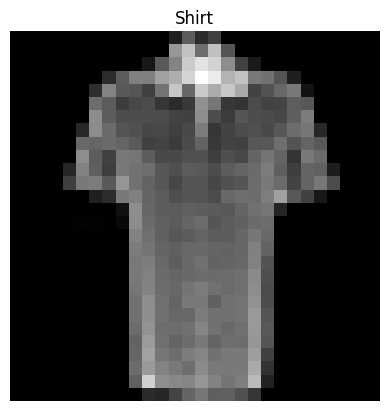

In [18]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label} | Label Size: {label.shape}")


## 3. Model 0 - Base Line Model

When starting to build a computer vision model, it's best practice to start with a baseline model. A baseline model is a model that performs well on a dataset. 

In [19]:
# Create a flatten model
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print of what happen
print(f"Shape before flatten: {x.shape} -> [batch_size, color_channels, height, width]")
print(f"Shape after flatten: {output.shape} -> [batch_size, color_channels*height*width]")


Shape before flatten: torch.Size([1, 28, 28]) -> [batch_size, color_channels, height, width]
Shape after flatten: torch.Size([1, 784]) -> [batch_size, color_channels*height*width]


In [20]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)


In [21]:
torch.manual_seed(42)

# Setup model with input and output shape based on data
model_0 =torch.compile(FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in hidden layer
    output_shape=len(class_names) # one for every class
))

model_0

OptimizedModule(
  (_orig_mod): FashionMNISTModelV0(
    (layer_stack): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=784, out_features=10, bias=True)
      (2): Linear(in_features=10, out_features=10, bias=True)
    )
  )
)

In [22]:
model_0.state_dict()

OrderedDict([('_orig_mod.layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('_orig_mod.layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('_orig_mod.layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740, 

### 3.1 Setup loss function, optimizer and evaluation metrics

* Loss Function - since we're working on a multi-class classification problem, we'll use `torch.nn.CrossEntropyLoss()`
* Optimizer - our optimizer of choice is `torch.optim.SGD`
* Evaluation metric - we'll use `torchmetrics.Accuracy`

In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


helper_functions.py already exists, skipping download.


In [24]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function 
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine Learning is very experimental, so it's a good idea to create a function to measure the time it takes to run a model.
1. Model's Performance ( loss and accuracy values etc..)
2. Model's Training Speed ( how fast it run)
3. Model's Memory Usage

In [25]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None) -> float:
    """
    Prints difference between start and end time.
    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device (str): Device that compute is running on.
    Returns:
        float: difference between start and end time.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [26]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start_time, end_time, device="cpu")


Train time on cpu: 0.000 seconds


1.1958007235080004e-05

### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss  ** per batch **
3. Loop through testing batches, perform inference steps, calculate the testing loss ** per batch **
4. Print out what's happening
5. Time it all


In [27]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (how many time the model will pass over the training dataset)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch} \n ----")

    # Training
    train_loss = 0

    # Add a loop to loop through the training data
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        # 1. forward pass
        y_pred = model_0(X)

        # 2. calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate training loss

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backpropagation
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Look at {batch * len(X)}/{len(train_dataloader.dataset)} samples |  Batch {batch}  | loss: {loss}")

    # Divide total train loss by length of train dataloader (per epoch)
    train_loss /= len(train_dataloader)

    # Testing
    test_loss , test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X_test)
            
            # 2. calculate loss (per batch)
            test_loss += loss_fn(test_pred, y_test)
            
            # 3. calculate accuracy (per batch)
            test_acc += accuracy_fn(y_true=y_test,
                                   y_pred=test_pred.argmax(dim=1))

        # Divide total test loss by length of test dataloader (per epoch)
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
        # Print out what's happening
        print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%")
    
    # End timer and print out how long each epoch took
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                     end=train_time_end_on_cpu,
                     device=str(next(model_0.parameters()).device))
    

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0 
 ----
Look at 0/60000 samples |  Batch 0  | loss: 2.366476535797119
Look at 12800/60000 samples |  Batch 400  | loss: 0.6423891186714172
Look at 25600/60000 samples |  Batch 800  | loss: 0.5696733593940735
Look at 38400/60000 samples |  Batch 1200  | loss: 0.38128769397735596
Look at 51200/60000 samples |  Batch 1600  | loss: 0.3490268886089325

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387%
Train time on cpu: 7.219 seconds

Epoch: 1 
 ----
Look at 0/60000 samples |  Batch 0  | loss: 0.37992873787879944
Look at 12800/60000 samples |  Batch 400  | loss: 0.6835907101631165
Look at 25600/60000 samples |  Batch 800  | loss: 0.3863295316696167
Look at 38400/60000 samples |  Batch 1200  | loss: 0.646413266658783
Look at 51200/60000 samples |  Batch 1600  | loss: 0.2691585123538971

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969%
Train time on cpu: 12.918 seconds

Epoch: 2 
 ----
Look at 0/60000 samples |  Batch 0  | loss: 0.36813652515411377
Look at 12800/

## 4. predictions and get Model 0 results

In [28]:
torch.manual_seed(42)
def eval_mode(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn):

    """
    Return a dictionary containing the results of model prediction on data_loader
    """
    model.eval()
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)
            # Accumulate the loss and accuracy values over the batches
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the model's average loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {
        "model_name": type(model._orig_mod).__name__ if hasattr(model, "_orig_mod") else model.__class__.__name__, # only works when model was created with a class
        "model_loss": loss.item(),
        "model_acc": acc
    }


# Calculate model 0 results on test data
model_0_results = eval_mode(model_0,
                            test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390323638916,
 'model_acc': 83.42651757188499}

## 5. Device agnostic code

In [29]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu"
device

'mps'

## 6. Model 1 : Building a better model using non-linear layers

We learned about non-linear layers and how to use them in our models. 

In [30]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [31]:
model_1 = torch.compile(FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)).to(device)
model_1

OptimizedModule(
  (_orig_mod): FashionMNISTModelV1(
    (layer_stack): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=784, out_features=10, bias=True)
      (2): ReLU()
      (3): Linear(in_features=10, out_features=10, bias=True)
      (4): ReLU()
    )
  )
)

In [32]:
next(model_1.parameters()).device

device(type='mps', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionalize training and evaluation/testing loop
1. Create a training function  - `train_step()`
2. Create a testing function - `test_step()`
3. Create a training loop - `train()`
4. Create a testing loop - `test()`

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """ 
    Performs a training with model trying to learn on dataloader.
    """

    train_loss, train_acc = 0, 0

    # Put model to train
    model.train()

    # Add a loop to loop through the training data
    for X, y in data_loader:
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. forward pass (output the raw logits)
        y_pred = model(X)

        # 2. calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate training loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backpropagation
        loss.backward()

        # 5. optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader (per epoch)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    # Print out what's happening
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    

In [35]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Perform a testing loop step on model going over data_loader
    """
    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():    
        for X, y in data_loader:
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)

            # 2. Calculate test loss and test accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # Go from logits -> pred probs -> pred labels
    
        # Adjust metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    
        # Print out what we get
        print(f"\nTest loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [36]:
torch.manual_seed(42)

# Measuring time
from timeit import default_timer as timer
train_start_time_on_mps = timer()

# Set epochs
epochs = 3


# Create a Optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch}\n----------\n")
    
    # Train model
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    # Test model
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_end_time_on_mps = timer()
total_train_time_model_1 = print_train_time(start=train_start_time_on_mps,
                        end=train_end_time_on_mps,
                        device=device)


  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
----------

Train loss: 1.11456 | Train accuracy: 58.46%

Test loss: 0.96320 | Test accuracy: 63.41%

Epoch: 1
----------

Train loss: 0.90905 | Train accuracy: 64.87%

Test loss: 0.74544 | Test accuracy: 72.61%

Epoch: 2
----------

Train loss: 0.59508 | Train accuracy: 78.25%

Test loss: 0.49708 | Test accuracy: 82.77%
Train time on mps: 49.175 seconds


**Note :** Sometimes , depending on your data/hardware you might find that the model trains faster on CPU than GPU.

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits of running on the GPU.
2. It could be that your GPU is not powerful enough to provide a speedup.
3. The hardware yo're using has a better CPU in terms compute capability than GPU.

For more on how to make your models compute faster, see here : https://horace.io/brrr_intro.html

In [37]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):

    """
    Return a dictionary containing the results of model prediction on data_loader
    """
    model.eval()
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)
            # Accumulate the loss and accuracy values over the batches
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the model's average loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {
        "model_name": type(model._orig_mod).__name__ if hasattr(model, "_orig_mod") else model.__class__.__name__, # only works when model was created with a class
        "model_loss": loss.item(),
        "model_acc": acc
    }


In [38]:
# Get dictionary from Model 1 
model_1_results = eval_model(model=model_1, 
                            data_loader=test_dataloader, 
                            loss_fn=loss_fn, 
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.49707889556884766,
 'model_acc': 82.76757188498402}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390323638916,
 'model_acc': 83.42651757188499}

## 7 Model 2 : Building Convolutional Neural Network (CNN)
CNN are known for their capability to recognize patterns in visual data.

To Find out what happening inside in CNN, see this website - https://poloclub.github.io/cnn-explainer/

In [40]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG from the Convolutional Neural Network (CNN) lecture.
    """    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,  
                      stride=1, 
                      padding=1), # value we can set ourselves in our NN are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, # there's a trick to calculating this
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1, # 1 because we use grayscale images if RGB then 3 because red green blue
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

### 7.1 Setting through nn.Conv2d()

See the documentation for nn.Conv2d() here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


In [42]:
torch.manual_seed(42)
# Create batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978, 

In [43]:
test_image.shape

torch.Size([3, 64, 64])

In [44]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)
                       
# pass the data through the conv2d layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Setup a loss function and optimizer

In [45]:
# Setup loss function / optimizer / accuracy metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.1)

### 7.3 Training and Testing `model_2` using our training and testing functions

In [46]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_model_2_start = timer()

# Train and test model

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch}\n")
    print(f"{60*'-'}")
    train_step(model=model_2,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device)

    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_model_2_end = timer()
total_train_time_model_2 = print_train_time(start=train_time_model_2_start,
                                            end=train_time_model_2_end,
                                            device=device)
total_train_time_model_2

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

------------------------------------------------------------
Train loss: 0.59142 | Train accuracy: 78.56%

Test loss: 0.39855 | Test accuracy: 85.66%

Epoch: 1

------------------------------------------------------------
Train loss: 0.36528 | Train accuracy: 86.80%

Test loss: 0.35175 | Test accuracy: 86.91%

Epoch: 2

------------------------------------------------------------
Train loss: 0.32993 | Train accuracy: 87.94%

Test loss: 0.32487 | Test accuracy: 88.02%
Train time on mps: 67.728 seconds


67.72822262498084

In [47]:
# Get mode_2 results
model_2_results = eval_model(
    model=model_2,
    loss_fn=loss_fn,
    data_loader=test_dataloader,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3248679041862488,
 'model_acc': 88.01916932907348}

In [48]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390323638916,
 'model_acc': 83.42651757188499}

In [49]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.49707889556884766,
 'model_acc': 82.76757188498402}

## 8 Compare model result and training time

In [50]:
import pandas as pd
compare_results = pd.DataFrame(
    [
        model_0_results,
        model_1_results,
        model_2_results,
   ]
)
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.497079,82.767572
2,FashionMNISTModelV2,0.324868,88.019169


In [51]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,18.613063
1,FashionMNISTModelV1,0.497079,82.767572,49.174763
2,FashionMNISTModelV2,0.324868,88.019169,67.728223


Text(0, 0.5, 'Model')

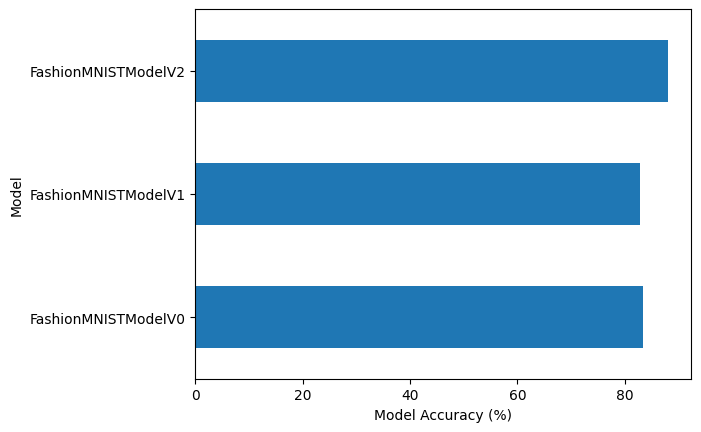

In [52]:
# Visualize our model results
compare_results.set_index('model_name')["model_acc"].plot(kind="barh")
plt.xlabel("Model Accuracy (%)")
plt.ylabel("Model")

## 9. Make and evaluate random predictions with the best model

In [53]:
def make_predictions(model : nn.Module,
                    data : list,
                    device : torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass(model out raw logits)
            pred_logit = model(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for futher calculation
            pred_probs.append(pred_prob.cpu())

    # Stack  the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [54]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

In [55]:
# Make Predictions
pred_probs = make_predictions(model=model_2,data=test_samples)

# View the first two predictions probabilities
pred_probs[:2]

tensor([[9.3938e-07, 1.2794e-07, 1.2109e-06, 1.8834e-06, 4.9422e-08, 2.2989e-03,
         9.3835e-07, 8.1701e-03, 1.5248e-04, 9.8937e-01],
        [3.3286e-04, 9.9306e-01, 8.7975e-06, 4.9735e-03, 1.3364e-03, 7.7085e-06,
         1.4901e-04, 5.3775e-05, 4.4046e-05, 3.8174e-05]])

In [56]:
# Convert prediction probabilities to prediction labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 1, 7, 5, 9, 9, 8, 0, 3])

In [57]:
test_labels

[9, 1, 7, 5, 9, 9, 8, 0, 3]

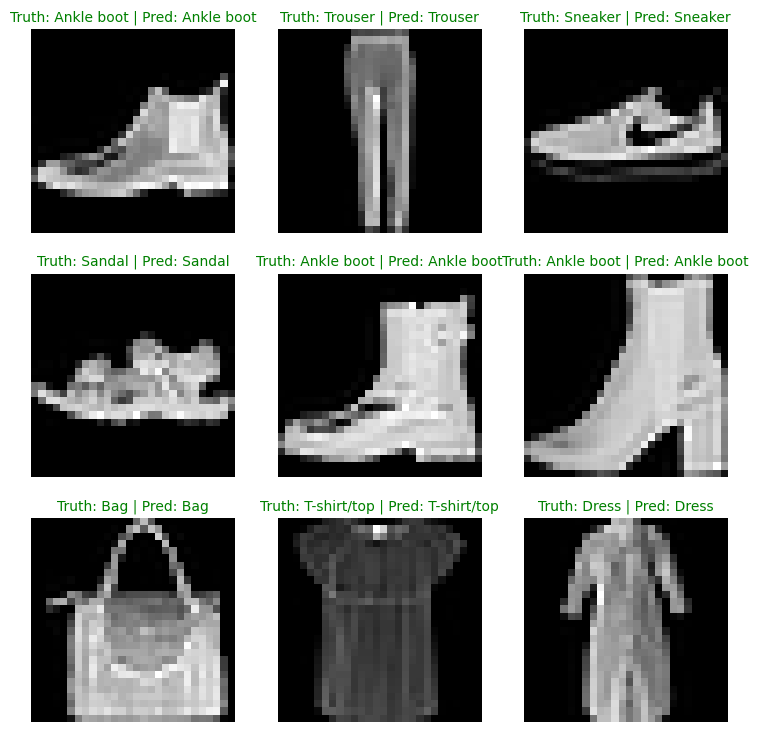

In [58]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplots
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the predictions (in text forms, e.g "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the true label
    truth_label = class_names[test_labels[i]]

    # Create the title for plot
    title = f"Truth: {truth_label} | Pred: {pred_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title, fontsize=10, color="green")
    else:
        plt.title(title, fontsize=10, color="red")

    plt.axis(False)

## 10. Making a Confusion matrix for further evaluation

A confusion matrix is a fantastic tool to evaluate a classification model.You can check PyTorch classification section 9 for more info. 

1. Make predictions with our trained model on the test data.
2. Make a confusion matrix - `torchmetrics.ConfusionMatrix` - https://docs.pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

Checkout this book for more details - https://sebastianraschka.com/

In [59]:
# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data to target device
        X = X.to(device)
        y = y.to(device)
        
        # Make predictions for forward pass
        y_logit = model_2(X)
        # Turn predictions logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Combine predictions and test labels into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [60]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [62]:
import torchmetrics
torchmetrics.__version__

'1.7.4'

In [66]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [67]:
test_data.targets, y_pred_tensor[:10]

(tensor([9, 2, 1,  ..., 8, 1, 5]), tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

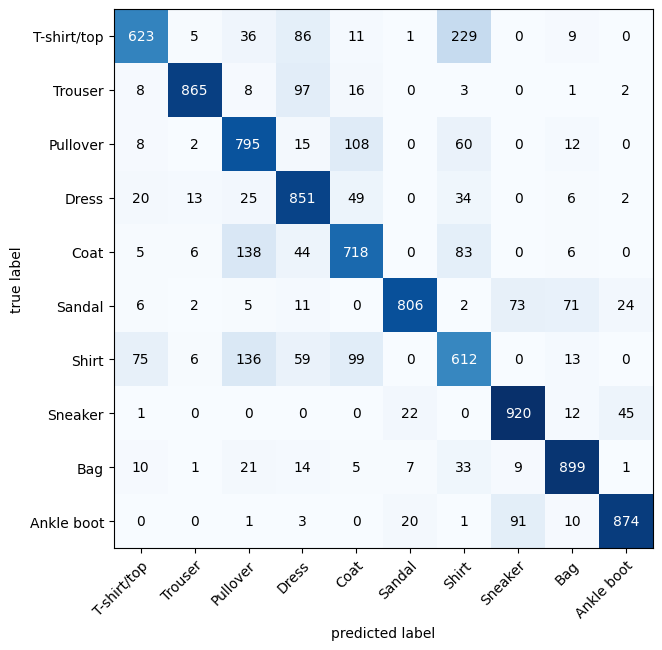

In [71]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup Confusion Matrix instance
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),  # matpotlib like working with numpy
                                 class_names = class_names,
                                 figsize = (10, 7)
                                 )

## 11. Save and load model

In [73]:
from pathlib import Path

# Create model dir path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model.pth


In [76]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

# Load the saved state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [77]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3248679041862488,
 'model_acc': 88.01916932907348}

In [80]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_result = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3248679041862488,
 'model_acc': 88.01916932907348}

In [82]:
# Check if models results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_result["model_loss"]),
              atol=1e-04)

tensor(True)